# U.S. Medical Insurance Costs

This project aims to investigate health insurance costs among different population groups and gain insights from the data provided in a **CSV** file.

### Importing the necessary libraries
To start, we need to import the libraries that we'll use. We'll import the Pandas library to work with data frames, and the Matplotlib library to create visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data

Next, we will load the data into a Pandas dataframe using the **read_csv()** function. We will specify the path to the **CSV** file and the delimiter used in the file, which will make it easier for me to analyze the data.
We will use the **head()** method to print the first rows of the dataframe to see how the information is organized.

In [2]:
patients = pd.read_csv('insurance.csv', delimiter=',')

patients.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### The data

This dataset is made up of 1338 records and contains information about their age, sex, BMI, number of children, whether they are smokers or not, region of residence, and the cost of health care.

In [3]:
patients.shape

(1338, 7)

In [4]:
print('No. of rows: {}, No. of columns: {}'.format(patients.shape[0], patients.shape[1] ))

No. of rows: 1338, No. of columns: 7


In [5]:
patients.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**insurance.csv** contains the following columns:

age: patient age <br>
sex: patient gender, female, male <br>
bmi: patient body mass index <br>
children: patient number of children <br>
smoker: patient smoking status <br>
region: patient U.S geopraphical region (northeast, southeast, southwest, northwest) <br>
charges: patient yearly medical insurance cost <br>
There are no signs of missing data.

Using the **describe()** function, we get a lot of information that allows us to start analyzing the data.

In [6]:
patients.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In this table we see the count, mean, standard deviation, minimum, and maximum values for each of the numeric columns in the data frame<br>
As we can see, the age column ranges from 18 to 64 years, with a mean of 39.2 and a standard deviation of 14.05<br>
The BMI column ranges from 15.96 to 53.13, with a mean of 30.66 and a standard deviation of 6.10<br>
The children column ranges from 0 to 5, with a mean of 1.09 and a standard deviation of 1.21<br>
Finally, the charges column ranges from 1121.87 to 63770.43, with a mean of 13270.42 and a standard deviation of 12110.01

### Analysis

Now the analysis can be started. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. 

We answer the following questions:

* The proportion of males and females
* How many children are there?
* What is the average age of the patients?
* How many smokers are there?
* How many patients there are in each geographic location?
* What are the average annual medical charges of the patients?
* Calculate the average cost of insurance by number of children to check the difference in the cost of medical charges
* Calculate the difference in the cost of medical charges between smokers and non-smokers

In [7]:
nosex = patients.sex.value_counts()
nosex

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
nummale = patients[patients.sex =='male'].shape[0]
numfemale = patients[patients.sex =='female'].shape[0]
propmale = round((nummale / patients.shape[0]), 2)
propfemale = round((numfemale / patients.shape[0]), 2)

print(f'\nThe proportion of males is { propmale }% and females is { propfemale }%'.format(propmale=propmale, propfemale=propfemale))


The proportion of males is 0.51% and females is 0.49%


In [9]:
numchild = patients.children.sum()
print(f'\nThe number of children in total is { numchild }'.format(numchild))


The number of children in total is 1465


In [10]:
averageage = round(patients.age.mean(), 2)
print(f'\nThe average age of the patients is { averageage } years'.format(averageage))


The average age of the patients is 39.21 years


In [11]:
numsmoker = patients[patients.smoker == 'yes'].shape[0]
print(f'\nThe number of smokers persons in total is { numsmoker }'.format(numsmoker))


The number of smokers persons in total is 274


In [12]:
regioncount = patients['region'].value_counts()
print(f'\nThe number of patients in each geographic location is: \n{ regioncount }'.format(regioncount))



The number of patients in each geographic location is: 
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [13]:
averagecharges = round(patients.charges.mean(), 2)
print(f'\nThe average annual medical charges of the patients is { averagecharges } $'.format(averagecharges))


The average annual medical charges of the patients is 13270.42 $


In [14]:
childrenzero = patients[patients.children == 0]
childrenone = patients[patients.children == 1]
childrentwo = patients[patients.children == 2]
childrenthree = patients[patients.children == 3]
childrenfour = patients[patients.children == 4]
childrenfive = patients[patients.children == 5]
avchgchilzero = round(childrenzero.charges.mean(), 2)
avchgchilone = round(childrenone.charges.mean(), 2)
increaseone = round((avchgchilone - avchgchilzero) / avchgchilzero * 100)
avchgchiltwo = round(childrentwo.charges.mean(), 2)
increasetwo = round((avchgchiltwo - avchgchilone) / avchgchilone * 100)
avchgchilthree = round(childrenthree.charges.mean(), 2)
increasethree = round((avchgchilthree - avchgchiltwo) / avchgchiltwo * 100)
avchgchilfour = round(childrenfour.charges.mean(), 2)
increasefour = round((avchgchilfour - avchgchilthree) / avchgchilthree * 100)
avchgchilfive = round(childrenfive.charges.mean(), 2)
increasefive = round((avchgchilfive - avchgchilfour) / avchgchilfour * 100)
print(f'\nThe average annual medical charges of the patients with zero kids is { avchgchilzero } $'.format(avchgchilzero))
print(f'\nThe average annual medical charges of the patients with one kid is { avchgchilone } $, a { increaseone } % increase'.format(avchgchilone, increaseone))
print(f'\nThe average annual medical charges of the patients with two kids is { avchgchiltwo } $, a { increasetwo } % increase'.format(avchgchiltwo, increasetwo))
print(f'\nThe average annual medical charges of the patients with three kids is { avchgchilthree } $, a { increasethree } % increase'.format(avchgchilthree, increasethree))
print(f'\nThe average annual medical charges of the patients with four kids is { avchgchilfour } $, a { increasefour } % increase'.format(avchgchilfour, increasefour))
print(f'\nThe average annual medical charges of the patients with five kids is { avchgchilfive } $, a { increasefive } % increase'.format(avchgchilfive, increasefive))


The average annual medical charges of the patients with zero kids is 12365.98 $

The average annual medical charges of the patients with one kid is 12731.17 $, a 3 % increase

The average annual medical charges of the patients with two kids is 15073.56 $, a 18 % increase

The average annual medical charges of the patients with three kids is 15355.32 $, a 2 % increase

The average annual medical charges of the patients with four kids is 13850.66 $, a -10 % increase

The average annual medical charges of the patients with five kids is 8786.04 $, a -37 % increase


In [15]:
smokers = patients[patients.smoker == 'yes']
nosmokers = patients[patients.smoker == 'no']
avsmokers = round(smokers.charges.mean(), 2)
avnosmokers = round(nosmokers.charges.mean(), 2)
incresmoker = round((avsmokers - avnosmokers) / avnosmokers * 100)
print(f'\nThe average annual medical charges of the smoker patients is { avsmokers } $ while the average cost for a non_smoker patient is { avnosmokers } $.\nThat is a { incresmoker } % increase'.format(avsmokers, avnosmokers, incresmoker))


The average annual medical charges of the smoker patients is 32050.23 $ while the average cost for a non_smoker patient is 8434.27 $.
That is a 280 % increase


### Visualizing the data

For a better understanding of the data, we can create visualizations using the **Matplotlib** library

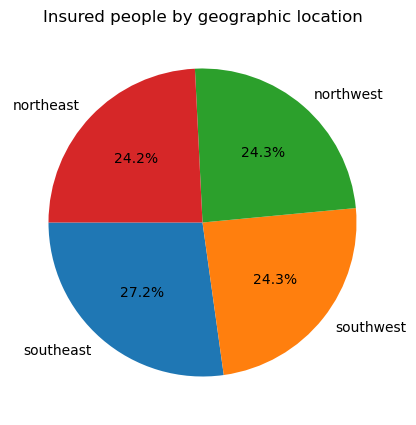

In [16]:
plt.figure(figsize=(12,5))
plt.title('Insured people by geographic location')
plt.pie(regioncount, labels=regioncount.index, autopct='%2.1f%%', startangle=180);

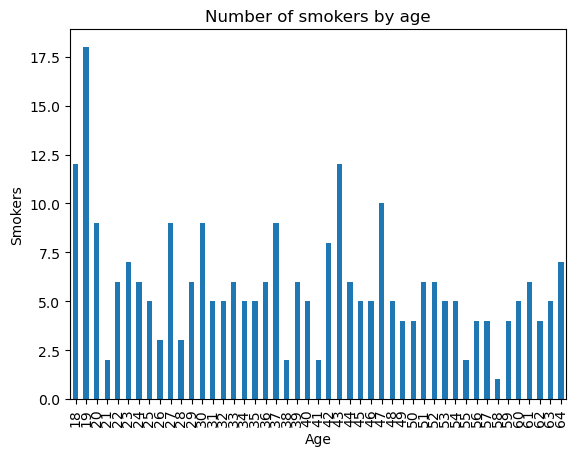

In [17]:
smokersage = smokers.age.value_counts().sort_index()
smokersage.plot(kind='bar')
plt.title('Number of smokers by age')
plt.xlabel('Age')
plt.ylabel('Smokers')
plt.show()

<Axes: title={'center': 'Relationship between smokers and charges applied'}, xlabel='smoker', ylabel='charges'>

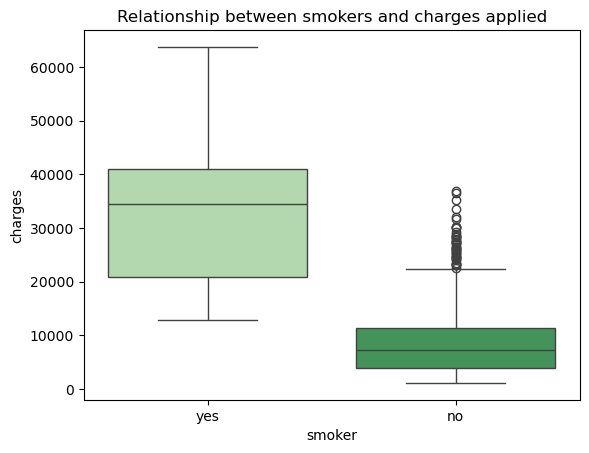

In [18]:
import seaborn as sns
plt.title('Relationship between smokers and charges applied')
sns.boxplot(data=patients, x='smoker', y='charges', hue="smoker", palette='Greens')

With this graph we can visually observe the data that we have obtained previously in numerical form, in which it is observed that the cost of medical charges for smoking patients is 280% higher than that of non-smoking patients, since the former have an average cost of 32050.23$ and the latter of  8434.27

<Axes: title={'center': 'Relationship between number of children and applied charges'}, xlabel='children', ylabel='charges'>

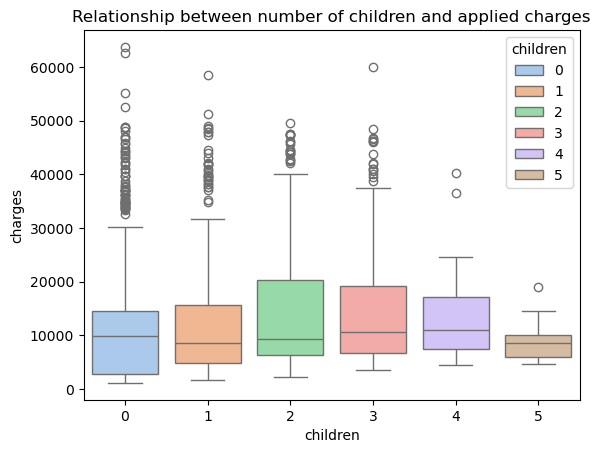

In [19]:
plt.title('Relationship between number of children and applied charges')
sns.boxplot(data=patients, x='children', y='charges', hue='children', palette='pastel')

In this graph we can observe a clear increase in the cost of medical charges for patients with children, as they have more children. Although, this trend is no longer clear until the third child, from which, the cost begins to decrease, which makes us think that other factors in the patient's life come into play, not related to the number of children.

<Axes: title={'center': 'Relationship between age and applied charges'}, xlabel='age', ylabel='charges'>

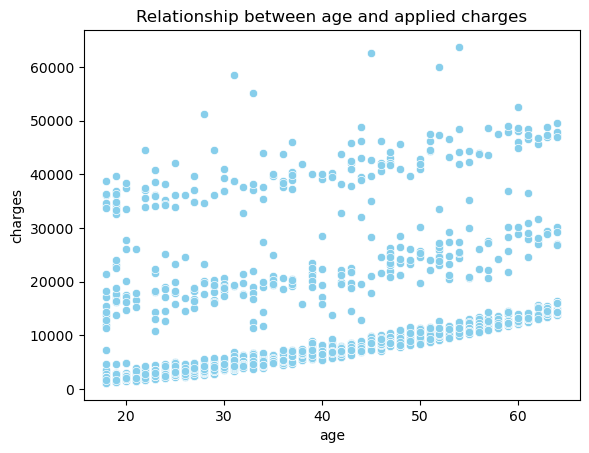

In [20]:
plt.title('Relationship between age and applied charges')
sns.scatterplot(data=patients, x='age', y='charges', color='skyblue')

This scatter plot shows the relationship between age and medical charges.
There appears to be a correlation between the two variables, as age increases, so do medical charges. While there are also some outliers in the graph, with some younger people having higher than average charges, and some older people having lower than average charges.
Overall, the graph suggests that age is a significant factor in determining medical charges.

<Axes: title={'center': 'Relationship between BMI and applied charges'}, xlabel='bmi', ylabel='charges'>

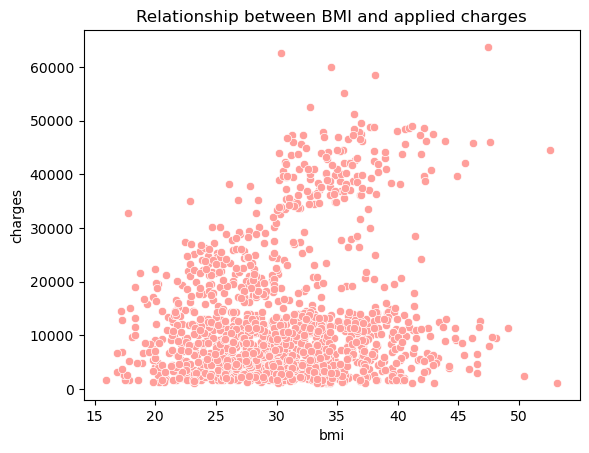

In [21]:
plt.title('Relationship between BMI and applied charges')
sns.scatterplot(data=patients, x='bmi', y='charges', color='#ff9f9b')

The graph shows a positive correlation between BMI and expenses, indicating that people with a higher BMI tend to have higher medical expenses. Although it is true that the scatter graph clearly shows a positive slope, which indicates that the higher the BMI, the higher the medical charge, we must also highlight that there are many registries in which this is not true, so we have to consider that in these patients, there are other criteria that significantly influence when determining the medical charges.

### Conclusion

By studying the insurance data provided, I have been able to gather some insights:
Smokers pay 280% more than non-smokers
Patients without children pay slightly less than patients with one to four children, but instead pay more than patients with 5 children. On the other hand, patients with 2 or 3 children, paid much more.
Among the other factors studied are age, BMI, and smoking.
Obesity is known to be a significant risk factor for many diseases, and obese people are generally considered to be at greater risk for their health, resulting in higher healthcare expenses and potentially higher insurance premiums.
Smoking is also recognized as a major risk factor for several health conditions, which can lead to higher healthcare costs and insurance premiums.
The bottom line is that by taking into account factors such as number of children, obesity, and smoking prevalence, insurers can develop more accurate and fair pricing strategies for their patients.